# Setup and Imports

In [27]:
# Add src directory to path
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Project imports
from config import DATA_PATHS, THEME_KEYWORDS, APP_NAMES
from sentiment_analyzer import SentimentAnalyzer
from theme_analyzer import ThemeAnalyzer

# Display settings
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Create output directory
os.makedirs('../data/processed', exist_ok=True)

print("Setup complete!")

Setup complete!


# Load Processed Reviews

In [28]:
# Load the preprocessed reviews from Task 1
df = pd.read_csv(r'C:\Users\hakima\Desktop\Project\review\data\processed\reviews_processed.csv')

print(f"Loaded {len(df)} reviews")
print(f"\nReviews per app:")
print(df['app_name'].value_counts())
print(f"\nColumns: {list(df.columns)}")

Loaded 9590 reviews

Reviews per app:
app_name
How to Bake     6655
CakeFizz        1937
beU Delivery     746
Kekmart          252
Name: count, dtype: int64

Columns: ['review_id', 'review_text', 'rating', 'review_date', 'review_year', 'review_month', 'app_code', 'app_name', 'user_name', 'thumbs_up', 'text_length', 'source']


In [29]:
# Preview the data
df.head()

,review_id,review_text,rating,review_date,review_year,review_month,app_code,app_name,user_name,thumbs_up,text_length,source
0,f65335ea-dbf3-4805-904c-c0750a7f223d,worst App,1,2025-12-16,2025,12,CakeFizz,CakeFizz,Creative OG,0,9,Google Play
1,04edd93d-3436-452f-b8ea-dfcf7990561b,they cancelled all my orders at last minute. After long time with many discussions and arguments...,1,2025-11-11,2025,11,CakeFizz,CakeFizz,Sonu Samuel,0,381,Google Play
2,01c2dcb8-224e-4f08-837d-a8f83a76125f,its an fraud app. very poor customer service. very bad...mobile number facke...there is no conta...,1,2025-10-23,2025,10,CakeFizz,CakeFizz,DILEEPKUMAR NARAYANASWAMY,2,139,Google Play
3,667124a5-737c-43fd-a046-c316f2b0d2b9,Very Bad Experience. I had ordered cake for my grand daughter to be delivered between 5PM to 8 P...,1,2025-10-19,2025,10,CakeFizz,CakeFizz,Ajay Kumar Gupta,1,240,Google Play
4,bcbf3aac-7201-4bbd-acae-46961e55ac66,"hum order kiye payment ho gya par na hi order id mila, conform order ka msg nhi aaya, refund bhi...",1,2025-10-12,2025,10,CakeFizz,CakeFizz,Rajan Alam,0,259,Google Play


# VADER Sentiment Analysis

In [34]:
# Initialize VADER analyzer
vader_analyzer = SentimentAnalyzer(method='vader')

# Analyze all reviews
df_vader = vader_analyzer.analyze_dataframe(df)

Initializing VADER sentiment analyzer...
VADER ready!

Analyzing sentiment for 9590 reviews using VADER...


Analyzing: 100%|██████████| 9590/9590 [00:01<00:00, 5155.90it/s]


SENTIMENT ANALYSIS SUMMARY

Overall Sentiment Distribution (VADER):
  POSITIVE: 7650 (79.8%)
  NEUTRAL: 1240 (12.9%)
  NEGATIVE: 700 (7.3%)

Sentiment by App:
  CakeFizz:
    Positive: 82.7% | Negative: 10.2%
  How to Bake:
    Positive: 82.6% | Negative: 3.0%
  Kekmart:
    Positive: 88.9% | Negative: 4.4%
  beU Delivery:
    Positive: 44.2% | Negative: 38.7%


# # VADER results preview

In [33]:
df_vader[['review_text', 'rating', 'sentiment_label_vader', 'sentiment_score_vader']].head(10)

,review_text,rating,sentiment_label_vader,sentiment_score_vader
0,worst App,1,NEGATIVE,0.6249
1,they cancelled all my orders at last minute. After long time with many discussions and arguments...,1,NEGATIVE,0.5574
2,its an fraud app. very poor customer service. very bad...mobile number facke...there is no conta...,1,NEGATIVE,0.9121
3,Very Bad Experience. I had ordered cake for my grand daughter to be delivered between 5PM to 8 P...,1,NEGATIVE,0.7346
4,"hum order kiye payment ho gya par na hi order id mila, conform order ka msg nhi aaya, refund bhi...",1,NEGATIVE,0.5859
5,I ordered a Cake and other things but they cancelled without a specific reason and I don't get a...,1,NEUTRAL,0.0387
6,I ordered a cake and flowers to gift someone for an occassion. Good app for ordering app.custome...,5,POSITIVE,0.9933
7,I clear mentioned to write the name of the person as Happy Birthday to Anaya but this service pr...,3,NEGATIVE,0.8100
8,"very bad application, my order cancelled without any information and till now i didn't get the r...",1,NEGATIVE,0.6997
9,this is very useful app for delicious cake and lovely gift 🎁,5,POSITIVE,0.9476


# DistilBERT Sentiment Analysis

In [32]:
# Initialize DistilBERT analyzer
distilbert_analyzer = SentimentAnalyzer(method='distilbert')

# Analyze all reviews (this takes longer)
df_sentiment = distilbert_analyzer.analyze_dataframe(df_vader)

Initializing DistilBERT sentiment analyzer...
(This may take a moment to download the model on first run)
Using CPU for inference


Device set to use cpu


DistilBERT ready!

Analyzing sentiment for 9590 reviews using DISTILBERT...


Analyzing: 100%|██████████| 9590/9590 [15:30<00:00, 10.31it/s]  



SENTIMENT ANALYSIS SUMMARY

Overall Sentiment Distribution (DISTILBERT):
  POSITIVE: 7793 (81.3%)
  NEGATIVE: 1797 (18.7%)

Sentiment by App:
  CakeFizz:
    Positive: 81.5% | Negative: 18.5%
  How to Bake:
    Positive: 85.8% | Negative: 14.2%
  Kekmart:
    Positive: 88.1% | Negative: 11.9%
  beU Delivery:
    Positive: 37.7% | Negative: 62.3%


# # DistilBERT results preview

In [35]:
df_sentiment[['review_text', 'rating', 'sentiment_label_vader', 'sentiment_label_distilbert']].head(10) 

,review_text,rating,sentiment_label_vader,sentiment_label_distilbert
0,worst App,1,NEGATIVE,NEGATIVE
1,they cancelled all my orders at last minute. After long time with many discussions and arguments...,1,NEGATIVE,NEGATIVE
2,its an fraud app. very poor customer service. very bad...mobile number facke...there is no conta...,1,NEGATIVE,NEGATIVE
3,Very Bad Experience. I had ordered cake for my grand daughter to be delivered between 5PM to 8 P...,1,NEGATIVE,NEGATIVE
4,"hum order kiye payment ho gya par na hi order id mila, conform order ka msg nhi aaya, refund bhi...",1,NEGATIVE,NEGATIVE
5,I ordered a Cake and other things but they cancelled without a specific reason and I don't get a...,1,NEUTRAL,NEGATIVE
6,I ordered a cake and flowers to gift someone for an occassion. Good app for ordering app.custome...,5,POSITIVE,POSITIVE
7,I clear mentioned to write the name of the person as Happy Birthday to Anaya but this service pr...,3,NEGATIVE,NEGATIVE
8,"very bad application, my order cancelled without any information and till now i didn't get the r...",1,NEGATIVE,NEGATIVE
9,this is very useful app for delicious cake and lovely gift 🎁,5,POSITIVE,POSITIVE


# Compare VADER vs DistilBERT

In [36]:
# Agreement rate between the two methods
agreement = (df_sentiment['sentiment_label_vader'] == df_sentiment['sentiment_label_distilbert']).mean()
print(f"Agreement rate: {agreement * 100:.1f}%")

# Confusion matrix
print("\nCross-tabulation (VADER vs DistilBERT):")
pd.crosstab(df_sentiment['sentiment_label_vader'], 
            df_sentiment['sentiment_label_distilbert'], 
            margins=True)

Agreement rate: 80.7%

Cross-tabulation (VADER vs DistilBERT):


sentiment_label_distilbert,NEGATIVE,POSITIVE,All
sentiment_label_vader,,,
NEGATIVE,666,34,700
NEUTRAL,558,682,1240
POSITIVE,573,7077,7650
All,1797,7793,9590


# # Visualize comparison

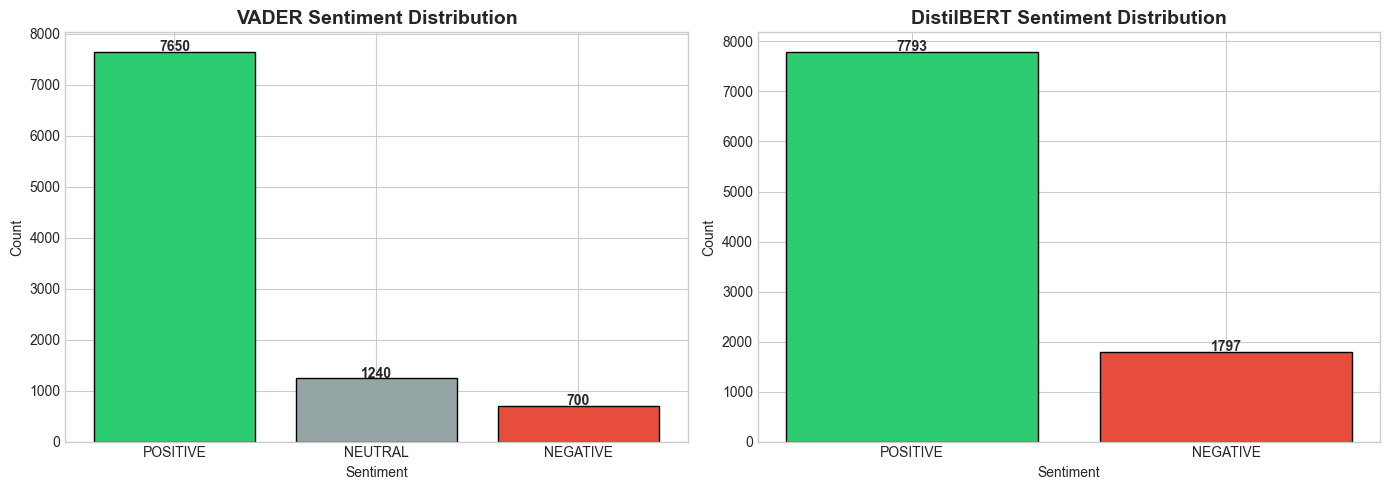

In [37]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# VADER distribution
ax1 = axes[0]
vader_counts = df_sentiment['sentiment_label_vader'].value_counts()
colors = {'POSITIVE': '#2ecc71', 'NEGATIVE': '#e74c3c', 'NEUTRAL': '#95a5a6'}
ax1.bar(vader_counts.index, vader_counts.values, 
        color=[colors.get(x, '#333') for x in vader_counts.index], edgecolor='black')
ax1.set_title('VADER Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
for i, (label, count) in enumerate(vader_counts.items()):
    ax1.text(i, count + 10, str(count), ha='center', fontweight='bold')
    # DistilBERT distribution
ax2 = axes[1]
distilbert_counts = df_sentiment['sentiment_label_distilbert'].value_counts()
ax2.bar(distilbert_counts.index, distilbert_counts.values,
        color=[colors.get(x, '#333') for x in distilbert_counts.index], edgecolor='black')
ax2.set_title('DistilBERT Sentiment Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
for i, (label, count) in enumerate(distilbert_counts.items()):
    ax2.text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/sentiment_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#  Sentiment by app

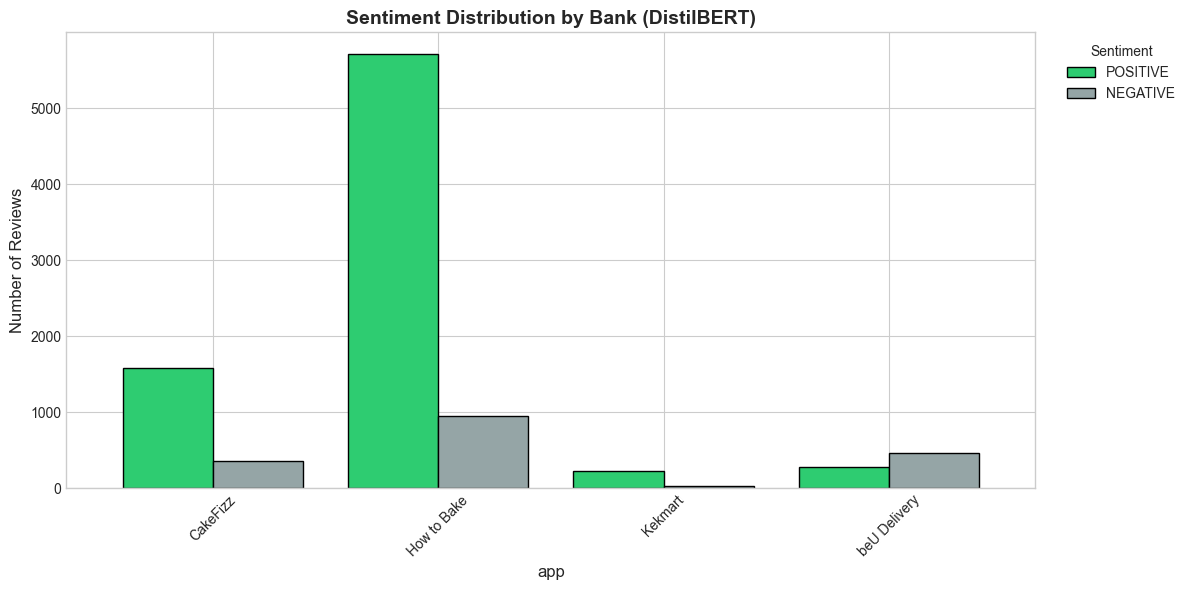

In [38]:
# Sentiment distribution by bank (using DistilBERT as primary)
fig, ax = plt.subplots(figsize=(12, 6))

sentiment_by_bank = df_sentiment.groupby(['app_name', 'sentiment_label_distilbert']).size().unstack(fill_value=0)

# Reorder columns
col_order = ['POSITIVE', 'NEUTRAL', 'NEGATIVE'] if 'NEUTRAL' in sentiment_by_bank.columns else ['POSITIVE', 'NEGATIVE']
sentiment_by_bank = sentiment_by_bank[[c for c in col_order if c in sentiment_by_bank.columns]]

sentiment_by_bank.plot(kind='bar', ax=ax, color=['#2ecc71', '#95a5a6', '#e74c3c'][:len(sentiment_by_bank.columns)], 
                       edgecolor='black', width=0.8)

ax.set_title('Sentiment Distribution by Bank (DistilBERT)', fontsize=14, fontweight='bold')
ax.set_xlabel('app', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../data/processed/sentiment_by_app.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
# Sentiment percentage by app
print("Sentiment Percentage by app (DistilBERT):")
print("=" * 60)

for app in df_sentiment['app_name'].unique():
    app_df = df_sentiment[df_sentiment['app_name'] == app]
    total = len(app_df)
    pos = len(app_df[app_df['sentiment_label_distilbert'] == 'POSITIVE'])
    neg = len(app_df[app_df['sentiment_label_distilbert'] == 'NEGATIVE'])

    print(f"\n{app}:")
    print(f"  Positive: {pos} ({pos/total*100:.1f}%)")
    print(f"  Negative: {neg} ({neg/total*100:.1f}%)")
    print(f"  Satisfaction Score: {pos/total*100:.1f}%")

Sentiment Percentage by app (DistilBERT):

CakeFizz:
  Positive: 1579 (81.5%)
  Negative: 358 (18.5%)
  Satisfaction Score: 81.5%

How to Bake:
  Positive: 5711 (85.8%)
  Negative: 944 (14.2%)
  Satisfaction Score: 85.8%

Kekmart:
  Positive: 222 (88.1%)
  Negative: 30 (11.9%)
  Satisfaction Score: 88.1%

beU Delivery:
  Positive: 281 (37.7%)
  Negative: 465 (62.3%)
  Satisfaction Score: 37.7%


# Sentiment vs Rating Correlation

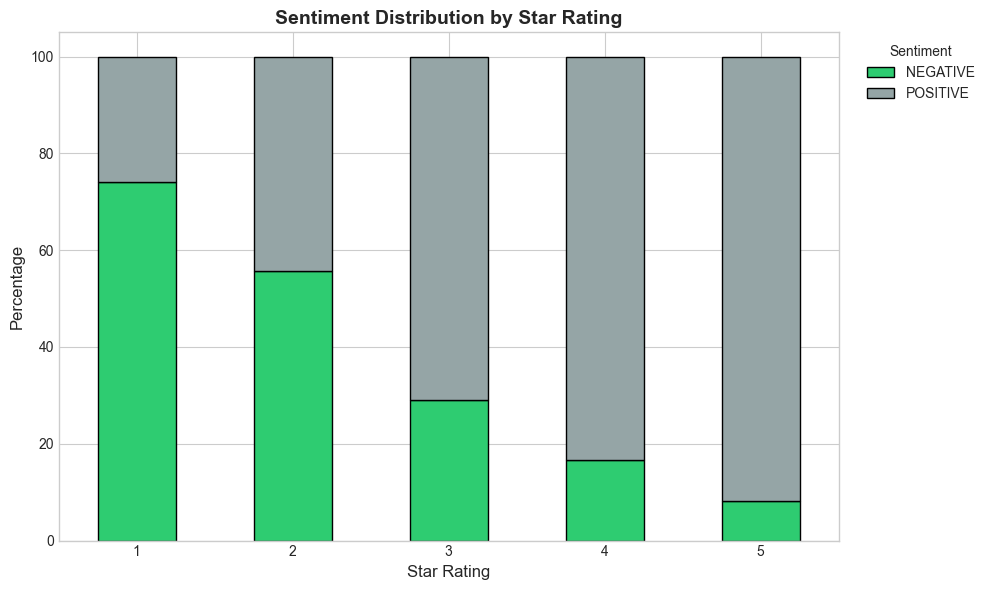


Observation: We expect 1-2 star reviews to be mostly NEGATIVE,
and 4-5 star reviews to be mostly POSITIVE.


In [40]:
# How well does sentiment match the star rating?
fig, ax = plt.subplots(figsize=(10, 6))

# Group by rating and sentiment
rating_sentiment = df_sentiment.groupby(['rating', 'sentiment_label_distilbert']).size().unstack(fill_value=0)

# Normalize to percentages
rating_sentiment_pct = rating_sentiment.div(rating_sentiment.sum(axis=1), axis=0) * 100

rating_sentiment_pct.plot(kind='bar', stacked=True, ax=ax, 
                          color=['#2ecc71', '#95a5a6', '#e74c3c'][:len(rating_sentiment_pct.columns)],
                          edgecolor='black')

ax.set_title('Sentiment Distribution by Star Rating', fontsize=14, fontweight='bold')
ax.set_xlabel('Star Rating', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../data/processed/sentiment_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nObservation: We expect 1-2 star reviews to be mostly NEGATIVE,")
print("and 4-5 star reviews to be mostly POSITIVE.")

# Thematic Analysis

In [41]:
# Show predefined themes
print("Predefined Themes and Keywords:")
print("=" * 60)
for theme, keywords in THEME_KEYWORDS.items():
    print(f"\n{theme}:")
    print(f"  Keywords: {', '.join(keywords[:5])}...")

Predefined Themes and Keywords:

Account Access Issues:
  Keywords: login, password, authentication, forgot, reset...

Transaction Performance:
  Keywords: transfer, slow, fast, speed, loading...

User Interface & Experience:
  Keywords: ui, interface, design, layout, navigation...

Technical Issues:
  Keywords: crash, bug, error, freeze, hang...

Customer Support:
  Keywords: support, help, service, response, contact...

Feature Requests:
  Keywords: feature, add, need, want, wish...

Security & Privacy:
  Keywords: security, safe, secure, privacy, fingerprint...


In [42]:
# Initialize theme analyzer
theme_analyzer = ThemeAnalyzer()

# Analyze themes
df_final = theme_analyzer.analyze_dataframe(df_sentiment)

Initializing TF-IDF vectorizer...
TF-IDF ready!
Loading spaCy model...

Analyzing themes for 9590 reviews...

[1/2] Extracting keywords using TF-IDF...
[2/2] Mapping keywords to themes...


Identifying themes: 100%|██████████| 9590/9590 [00:00<00:00, 27400.16it/s]



THEMATIC ANALYSIS SUMMARY

Overall Theme Distribution:
  Customer Support: 1527 reviews (15.9%)
  User Interface & Experience: 1057 reviews (11.0%)
  Feature Requests: 791 reviews (8.2%)
  Transaction Performance: 301 reviews (3.1%)
  Technical Issues: 153 reviews (1.6%)
  Security & Privacy: 55 reviews (0.6%)
  Account Access Issues: 31 reviews (0.3%)

  Reviews with no identified theme: 6314 (65.8%)

Top Theme by App:
  CakeFizz: Customer Support (512 mentions)
  How to Bake: User Interface & Experience (801 mentions)
  Kekmart: Customer Support (69 mentions)
  beU Delivery: Customer Support (205 mentions)


## Preview theme results

In [43]:

df_final[['review_text', 'primary_theme', 'themes', 'matched_keywords']].head(10)

,review_text,primary_theme,themes,matched_keywords
0,worst App,Other,[],[]
1,they cancelled all my orders at last minute. After long time with many discussions and arguments...,Other,[],[]
2,its an fraud app. very poor customer service. very bad...mobile number facke...there is no conta...,Customer Support,"[Customer Support, Security & Privacy]","[service, fraud, contact]"
3,Very Bad Experience. I had ordered cake for my grand daughter to be delivered between 5PM to 8 P...,Other,[],[]
4,"hum order kiye payment ho gya par na hi order id mila, conform order ka msg nhi aaya, refund bhi...",Transaction Performance,"[Transaction Performance, Security & Privacy]","[fraud, payment]"
5,I ordered a Cake and other things but they cancelled without a specific reason and I don't get a...,Other,[],[]
6,I ordered a cake and flowers to gift someone for an occassion. Good app for ordering app.custome...,Customer Support,[Customer Support],[support]
7,I clear mentioned to write the name of the person as Happy Birthday to Anaya but this service pr...,Customer Support,[Customer Support],[service]
8,"very bad application, my order cancelled without any information and till now i didn't get the r...",Other,[],[]
9,this is very useful app for delicious cake and lovely gift 🎁,Other,[],[]


# Theme Distribution

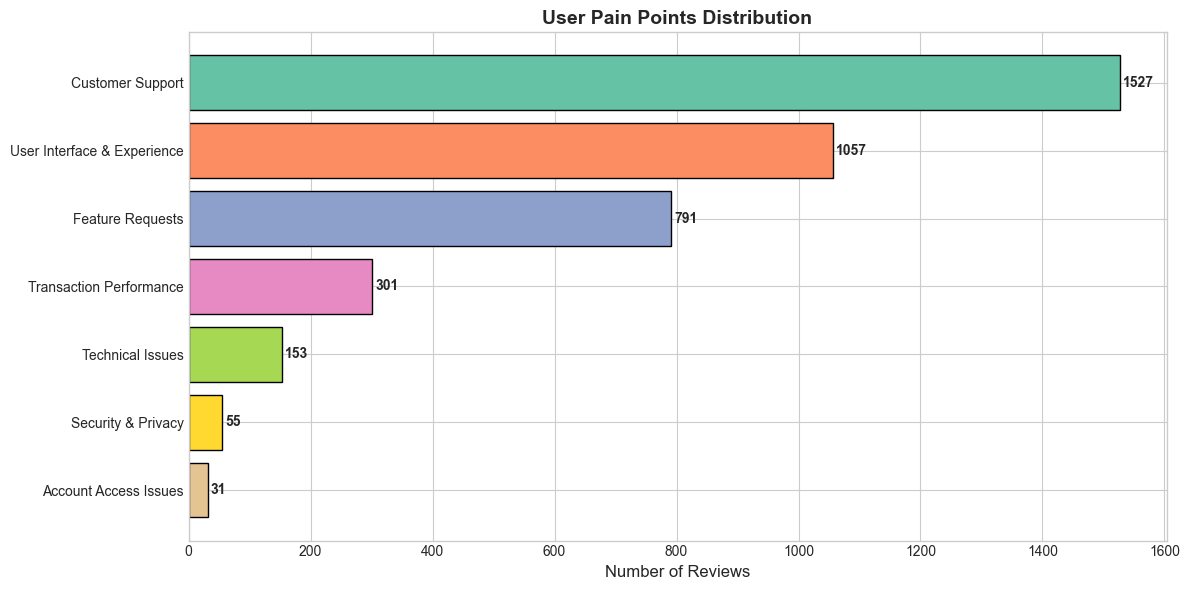

In [45]:
# Overall theme distribution
all_themes = []
for themes in df_final['themes']:
    if isinstance(themes, list):
        all_themes.extend(themes)
    elif isinstance(themes, str):
        # Handle string representation of list
        import ast
        try:
            all_themes.extend(ast.literal_eval(themes))
        except:
            pass

theme_counts = Counter(all_themes)

fig, ax = plt.subplots(figsize=(12, 6))

themes = [t[0] for t in theme_counts.most_common()]
counts = [t[1] for t in theme_counts.most_common()]

colors = sns.color_palette('Set2', len(themes))
bars = ax.barh(themes, counts, color=colors, edgecolor='black')
# Add count labels
for bar, count in zip(bars, counts):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
            str(count), va='center', fontweight='bold')

ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_title('User Pain Points Distribution', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Most common at top

plt.tight_layout()
plt.savefig('../data/processed/theme_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Themes by app

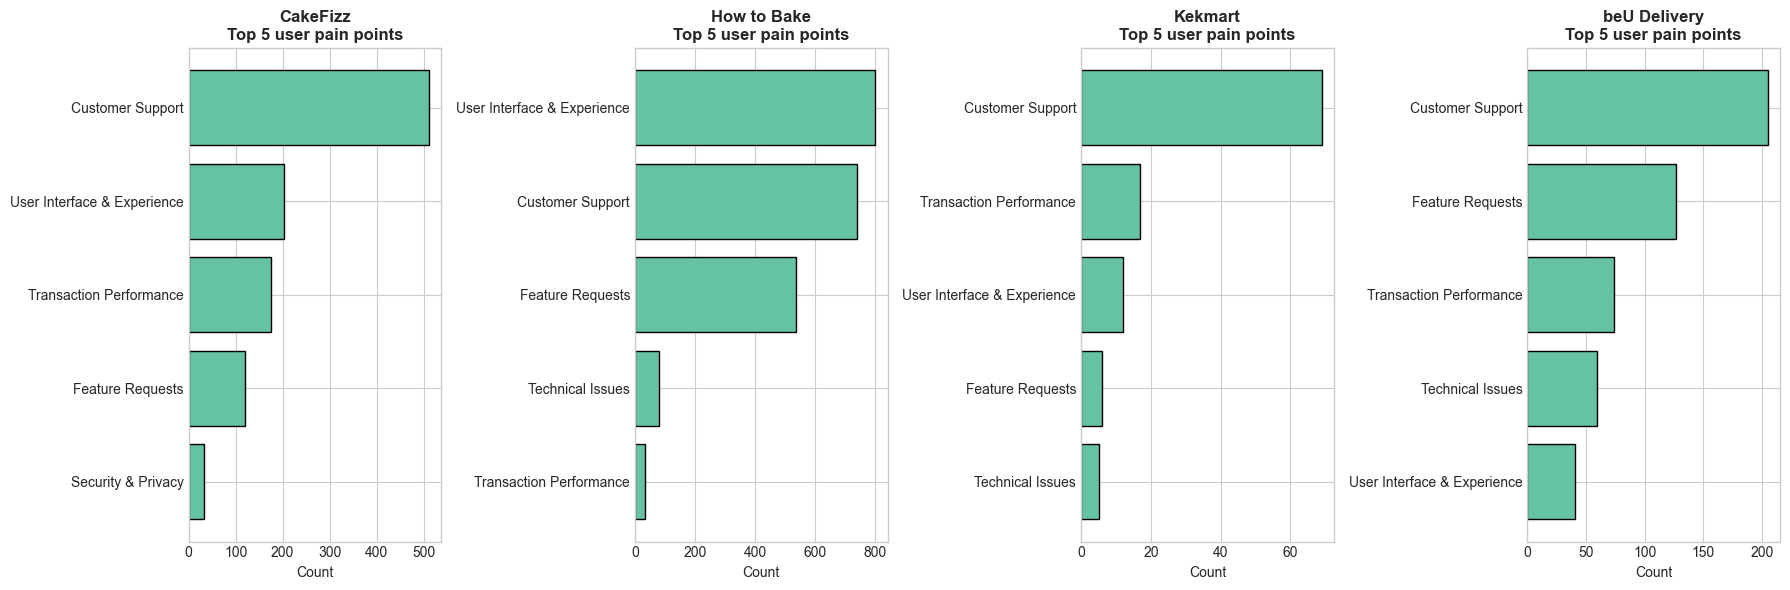

In [46]:

# Theme distribution by app
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for idx, app in enumerate(df_final['app_name'].unique()):
    ax = axes[idx]
    app_df = df_final[df_final['app_name'] == app]

    app_themes = []

    for themes in app_df['themes']:
        if isinstance(themes, list):
            app_themes.extend(themes)

        elif isinstance(themes, str):
            try:
                app_themes.extend(ast.literal_eval(themes))
            except:
                pass

    # ✅ FIX: this block is now correctly indented
    if app_themes:
        app_theme_counts = Counter(app_themes).most_common(5)
        themes = [t[0] for t in app_theme_counts]
        counts = [t[1] for t in app_theme_counts]

        ax.barh(
            themes,
            counts,
            edgecolor='black'
        )
        ax.set_xlabel('Count')
        ax.set_title(f'{app}\nTop 5 user pain points', fontsize=12, fontweight='bold')
        ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../data/processed/themes_by_app.png', dpi=300, bbox_inches='tight')
plt.show()


# Theme-Sentiment Correlation

In [47]:
# Calculate theme-sentiment correlation
correlation_df = theme_analyzer.get_theme_sentiment_correlation(df_final)


Theme-Sentiment Correlation:
------------------------------------------------------------
  👍 Account Access Issues:
      Positive: 51.6% | Negative: 25.8%
  👍 Transaction Performance:
      Positive: 75.1% | Negative: 11.6%
  👍 User Interface & Experience:
      Positive: 94.8% | Negative: 2.7%
  👍 Technical Issues:
      Positive: 44.4% | Negative: 37.3%
  👍 Customer Support:
      Positive: 83.0% | Negative: 11.7%
  👍 Feature Requests:
      Positive: 80.9% | Negative: 10.2%
  👍 Security & Privacy:
      Positive: 52.7% | Negative: 43.6%


# Visualize theme-sentiment correlation

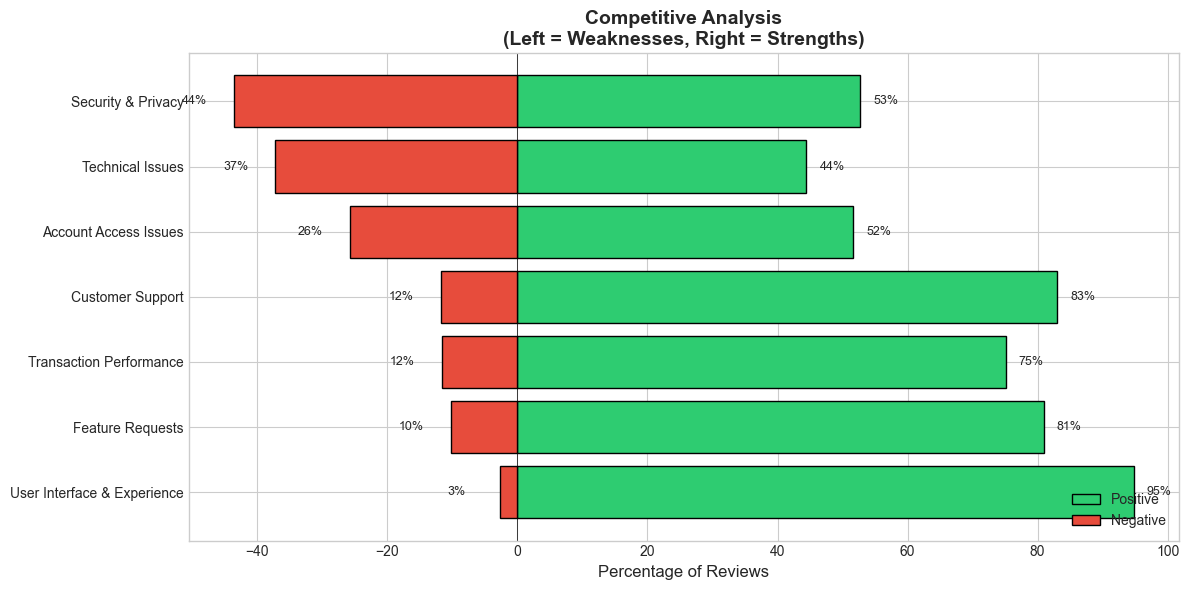

In [48]:
if correlation_df is not None and len(correlation_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    # Sort by negative percentage (pain points first)
    correlation_df = correlation_df.sort_values('negative_pct', ascending=True)
    themes = correlation_df['theme']
    pos_pct = correlation_df['positive_pct']
    neg_pct = correlation_df['negative_pct']
    y_pos = range(len(themes))
     # Create horizontal bar chart
    ax.barh(y_pos, pos_pct, color='#2ecc71', label='Positive', edgecolor='black')
    ax.barh(y_pos, -neg_pct, color='#e74c3c', label='Negative', edgecolor='black')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(themes)
    ax.set_xlabel('Percentage of Reviews', fontsize=12)
    ax.set_title('Competitive Analysis\n(Left = Weaknesses, Right = Strengths)', 
                 fontsize=14, fontweight='bold')
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.legend(loc='lower right')
    
    # Add percentage labels
    for i, (p, n) in enumerate(zip(pos_pct, neg_pct)):
        ax.text(p + 2, i, f'{p:.0f}%', va='center', fontsize=9)
        ax.text(-n - 8, i, f'{n:.0f}%', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('../data/processed/theme_sentiment_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

#  Key Insights

In [56]:
# Generate key insights
print("=" * 60)
print("KEY INSIGHTS FROM SENTIMENT & THEMATIC ANALYSIS")
print("=" * 60)

# 1. Overall sentiment
total = len(df_final)
pos_total = len(df_final[df_final['sentiment_label_distilbert'] == 'POSITIVE'])
neg_total = len(df_final[df_final['sentiment_label_distilbert'] == 'NEGATIVE'])

print(f"\n1. OVERALL SENTIMENT")
print(f"   Total reviews analyzed: {total}")
print(f"   Positive: {pos_total} ({pos_total/total*100:.1f}%)")
print(f"   Negative: {neg_total} ({neg_total/total*100:.1f}%)")

# 2. Best and worst performing bank
print(f"\n2. App COMPARISON")
app_scores = {}
for app in df_final['app_name'].unique():
    app_df = df_final[df_final['app_name'] == app]
    pos = len(app_df[app_df['sentiment_label_distilbert'] == 'POSITIVE'])
    app_scores[app] = pos / len(app_df) * 100
    best_app = max(app_scores, key=app_scores.get)
worst_app = min(app_scores, key=app_scores.get)

print(f"   Best satisfaction: {best_app} ({app_scores[best_app]:.1f}% positive)")
print(f"   Needs improvement: {worst_app} ({app_scores[worst_app]:.1f}% positive)")

# 3. Top pain points (themes with highest negative %)
print(f"\n3. TOP PAIN POINTS (Themes with most negative reviews)")
if correlation_df is not None:
    pain_points = correlation_df.nlargest(3, 'negative_pct')
    for _, row in pain_points.iterrows():
        print(f"   - {row['theme']}: {row['negative_pct']:.1f}% negative")

# 4. Satisfaction drivers (themes with highest positive %)
print(f"\n4. SATISFACTION DRIVERS (Themes with most positive reviews)")
if correlation_df is not None:
    drivers = correlation_df.nlargest(3, 'positive_pct')
    for _, row in drivers.iterrows():
        print(f"   - {row['theme']}: {row['positive_pct']:.1f}% positive")


KEY INSIGHTS FROM SENTIMENT & THEMATIC ANALYSIS

1. OVERALL SENTIMENT
   Total reviews analyzed: 9590
   Positive: 7793 (81.3%)
   Negative: 1797 (18.7%)

2. App COMPARISON
   Best satisfaction: Kekmart (88.1% positive)
   Needs improvement: beU Delivery (37.7% positive)

3. TOP PAIN POINTS (Themes with most negative reviews)
   - Security & Privacy: 43.6% negative
   - Technical Issues: 37.3% negative
   - Account Access Issues: 25.8% negative

4. SATISFACTION DRIVERS (Themes with most positive reviews)
   - User Interface & Experience: 94.8% positive
   - Customer Support: 83.0% positive
   - Feature Requests: 80.9% positive


# Sample Reviews by Theme

In [50]:
# Show sample reviews for top themes
print("Sample Reviews by Theme")
print("=" * 60)

for theme in list(THEME_KEYWORDS.keys())[:4]:  # Top 4 themes
    print(f"\n{theme}")
    print("-" * 40)
    
    # Find reviews with this theme
    theme_reviews = df_final[df_final['primary_theme'] == theme]
    
    if len(theme_reviews) > 0:
        # Show one positive and one negative
        pos_review = theme_reviews[theme_reviews['sentiment_label_distilbert'] == 'POSITIVE'].head(1)
        neg_review = theme_reviews[theme_reviews['sentiment_label_distilbert'] == 'NEGATIVE'].head(1)
        
        if len(pos_review) > 0:
            print(f"  [POSITIVE] \"{pos_review['review_text'].values[0][:150]}...\"")
        if len(neg_review) > 0:
            print(f"  [NEGATIVE] \"{neg_review['review_text'].values[0][:150]}...\"")
    else:
        print("  No reviews found for this theme.")

Sample Reviews by Theme

Account Access Issues
----------------------------------------
  [POSITIVE] "Cakefizz is dedicated to providing high-quality cakes at affordable prices, making it accessible to everyone...."
  [NEGATIVE] "It sounds like you're asking for a review of Cake Fizzonlline's cake delivery service. I don't have access to specific user reviews or the latest upda..."

Transaction Performance
----------------------------------------
  [POSITIVE] "No regrets in switching! This app is so smooth and convenient for transactions. *..."
  [NEGATIVE] "hum order kiye payment ho gya par na hi order id mila, conform order ka msg nhi aaya, refund bhi nhi aaya, call kiye to call nhi lga, email Kiye to ko..."

User Interface & Experience
----------------------------------------
  [POSITIVE] "this is a fantastic app, it's super easy to order delicious cake in occasions...."
  [NEGATIVE] "Customer reviews and ratings help me decide quickly 😍..."

Technical Issues
-----------------------

# Save Results

In [51]:
# Save final results with sentiment and themes
output_path = r'C:\Users\hakima\Desktop\Project\review\data\processed\reviews_with_sentiment.csv'
df_final.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

# Show final columns
print(f"\nFinal dataset columns:")
for col in df_final.columns:
    print(f"  - {col}")

Results saved to C:\Users\hakima\Desktop\Project\review\data\processed\reviews_with_sentiment.csv

Final dataset columns:
  - review_id
  - review_text
  - rating
  - review_date
  - review_year
  - review_month
  - app_code
  - app_name
  - user_name
  - thumbs_up
  - text_length
  - source
  - sentiment_label_vader
  - sentiment_score_vader
  - sentiment_label_distilbert
  - sentiment_score_distilbert
  - themes
  - primary_theme
  - matched_keywords
  - tfidf_keywords
